In [1]:
import numpy as np
from scipy.stats import sem
from scipy.constants import R
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
## HEADGROUPS ##
Piperazine      = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Piperazine_0' #Ring with two amines 
amine           = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine_0' #Alcohol_link_amine
amine2          = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine2_0' #Alcohol_link_amine 
KC              = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/KC_0' #KC1 - Ketal no linker 
DAP_amine       = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/DAP_amine_0'  #Amine_two_esters
MC3_amine       = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/MC3_amine_0/MAP3' #Amine_one_ester
Amine_link_ester  = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine_link_ester_0' #Amine_link_ester 
Amine_link_ether  = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine_link_ether_0' #Amine_link_ether 
ether_ring        = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ether_ring_0/MAP3'#KC2 -ketal with linker 
ether_broken_map2 = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/ether_0/MAP2' #Amine_two_ethers  
Amine_branched    = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine_branched_0' #Teritiary amine with two branching tails 
triple_amine      = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/triple_amine_0_0_0' #maybe add as well

#Amine carbamate
#Amine ester disulfied

HEADS = [amine, amine2, KC, ether_ring, ether_broken_map2, DAP_amine, MC3_amine, Amine_link_ester, Amine_link_ether, Amine_branched]
HEAD_names = ['amine', 'amine2', 'KC', 'ether_ring', 'ether_broken_map2', 'DAP_amine', 'MC3_amine', 'Amine_link_ester', 'Amine_link_ether', 'Amine_branched']

#PEGylated lipid fragments
ALC             = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/ALC0159_0' #Pzifer PEGylated lipid Neutral and charged form
DMG             = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/DMG-PEG'   #Moderna PEGylated lipid

PEGs = [ALC, DMG]
PEG_names = ['ALC','DMG']

## LINKERS ##
Ester_branched3 = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ester_branched/MAP3' #Goodie
Ester_branched_long_unsat = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ester_branched_long_unsat_bulk' #Re-run 
Ester_branched_long_sat = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ester_branched_long_sat_bulk' #Re-run
Ether_link_sat   = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ether_link_sat' #Extend sims, otherwise ok
Ether_link_unsat = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ether_link_unsat' #Extend sims, otherwise ok
SC1_ester_SC1   = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Sc1_ester_Sc1'
C1_ester_C1_    = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/C1_ester_C1'
C4h_ester_C4h   = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/C4h_ester_C4h'
Double_ester_long = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Double_ester_long'
Double_ester_branched = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Double_ester_long_branched'

##Missing linkers:
#Ester disulfied 
#carbamate 

LINKERS = [  SC1_ester_SC1, Ether_link_sat, Ether_link_unsat, Ester_branched_long_unsat, Ester_branched_long_sat]
LINKER_names = [ 'SC1_ester_SC1', 'Ether_link_sat', 'Ether_link_unsat', 'Ester_branched_long_unsat', 'Ester_branched_long_sat']

In [3]:
fragments = HEADS + LINKERS + PEGs
fragment_labels = HEAD_names + LINKER_names + PEG_names

In [4]:
def load_SASA (path):
    '''STD and AVA'''
    AA = np.loadtxt('{}/AA/resarea_SASA.xvg'.format(path), comments=('#','@'))[1:]
    CG = np.loadtxt('{}/CG_WAT/CG_SASA/resarea_SASA.xvg'.format(path), comments=('#','@'))[1:]
    return AA, CG

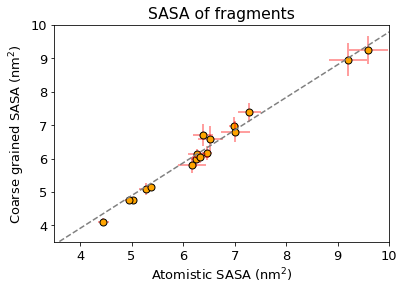

In [23]:
plt.rcParams.update({'font.size': 13})

PA = []
CA = []


for idx, f in enumerate(fragments):
    try:
        AA, CG    = load_SASA(f)
    except:
        print (f)
        print (fragment_labels[idx])
        
    plt.errorbar(AA[0], CG[0], xerr=AA[1], yerr=CG[1], ecolor='red', alpha=0.5)
    plt.plot(AA[0], CG[0], 'o', label=fragment_labels[idx], ms=7, color='orange', mec='black')
    
    CA.append(AA[0])
    PA.append(CG[0])
        
linr_model = LinearRegression().fit(np.array(PA).reshape(-1, 1), np.array(CA).reshape(-1, 1))
a= linr_model.coef_[0]
b = linr_model.intercept_
X = np.linspace(0, np.max(PA)+5, 10)
Y = a*X+0

plt.plot(X, Y, linestyle='--', color='grey')

    
plt.xlabel('Atomistic SASA (nm$^2$)' )
plt.ylabel('Coarse grained SASA (nm$^2$)')

plt.ylim(3.5,10)
plt.xlim(3.5,10)

plt.title('SASA of fragments')

plt.savefig('SASA_fragments.png', dpi=300, bbox_inches='tight')
plt.savefig('SASA_fragments.pdf', dpi=300, bbox_inches='tight')
plt.show()